In [2]:
import numpy as np # numpy is the basic library for numerical operations and arrays
from scipy.integrate import odeint # scipy is for scientific functions and objects. Integrate is a module of scipy for numerical integrations, and we are using its function odeint for ordinary differential equations
import matplotlib.pyplot as plt # matplotlib is the basic library for plots
# below is a command for easier visualisations in the jupyter notebook
%matplotlib inline
import seaborn as sns # seaborn is a plot library with good implementations for dataframes, and it runs on top of plt
import pandas as pd # pandas is the basic library for dealing with dataframes

#import matplotlib as mpl # here we import the entire matplotlib just to set the dpi of high quality figures
#mpl.rcParams['figure.dpi'] = 350 # UNCOMMENT THESE LINES TO GENERATE HIGH QUALITY PLOTS

The model in box 3 is simple enough that the equilibrium abundances can be directly calculated. However, differential equation models like that can also be numerically simulated from an initial condition. Here we present a clearly understandable python code for numerical simulations and the exact equilibrium solution, generating the figures in the main text.

The comments in the code give detailed instructions on how to understand and use it.

# Simulation

In [3]:
def Model(y0,g,e1,e2,D,w,de1,de2,ti,time):
# Function defining the model. Inputs initial conditions (y0), parameters and maxtime; outputs time (T) and trajectories arrays (sol)

    def System(y,t,g,e1,e2,D,w,de1,de2,ti): # Function defining the system of differential equations. It's used by scipy.odeint as the equation to be integrated
    # This is the function we change to define a different ODE system if we want a different model


        dy1 = -g*y[:n]**2 + e1*(D-y[:n]) + w*(de1**ti)*y[:n] # This is the equation for LMAs (using e1 and de1). dy1 has dimension n.
        dy2 = -g*y[n:]**2 + e2*(D-y[n:]) + w*(de2**ti)*y[n:] # This is the equation for HMAs (using e2 and de2). dy2 has dimension n.


        return np.concatenate([dy1,dy2]) # We chain together the two types of equations to return a single dy (of dimension 2n)



    T = np.linspace(0,time,100*time+1) # Time array. We integrate the function for these time values
    sol = odeint(System, y0, T, args=(g,e1,e2,D,w,de1,de2,ti,)) # Call odeint to integrate the system

    return sol,T

In [4]:
# Parameters

n = 500 # number of microbe types in each host

g = 1 # gamma, microbe intraspecific competition
ti = np.random.rand(n) # microbial trait determining value for the host (from zero to 1)
de = 5 # delta, host selection (5 is the LMA value)
e = 100 # epsilon, pump rate (100 is the LMA value)
D = 0.01*np.random.rand(n) # microbial abundance in the water, outside hosts
w = np.random.rand(n) # microbes' reproduction rate
maxtime=2 # simulation time


Both mechanisms are different:

In [5]:
y0 = 0.1*np.random.rand(n) # Initial abundances for the n microbes
y0 = np.concatenate([y0,y0]) # this is duplicating the initial abundances, the first n are for LMAs and the other n are for HMAs
sol,solT = Model(y0,g,e,e/10,D,w,de,10*de,ti,maxtime) # Calling the model. e/10 is the pump rate for HMAs and 10de is the selection for HMAs

X1 = sol.T[:n] # LMA abundances (the .T is transposing the array, to get a format microbe vs time instead of time vs microbe)
X2 = sol.T[n:] # HMA abundances

Text(0.5, 0, 'Time')

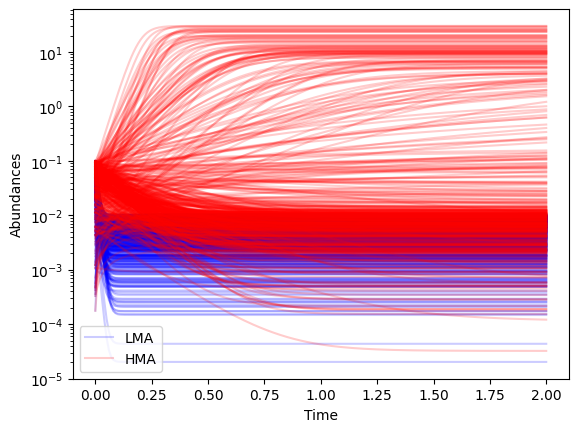

In [6]:
# This is plotting the abundances of each microbe type for a single LMA/HMA pair containing the same microbe types. Red lines are HMA microbes and blue lines are LMA microbes.

for i in range(X1.shape[0]):
  if(i==0):
    plt.plot(solT,X1[i],c='blue',alpha=0.2,label='LMA')
  else:
    plt.plot(solT,X1[i],c='blue',alpha=0.2)
for i in range(X2.shape[0]):
  if(i==0):
    plt.plot(solT,X2[i],c='red',alpha=0.2,label='HMA')
  else:
    plt.plot(solT,X2[i],c='red',alpha=0.2)

plt.legend(loc='best')
plt.ylabel('Abundances')
plt.yscale('log')
plt.xlabel('Time')

(1, 2000)

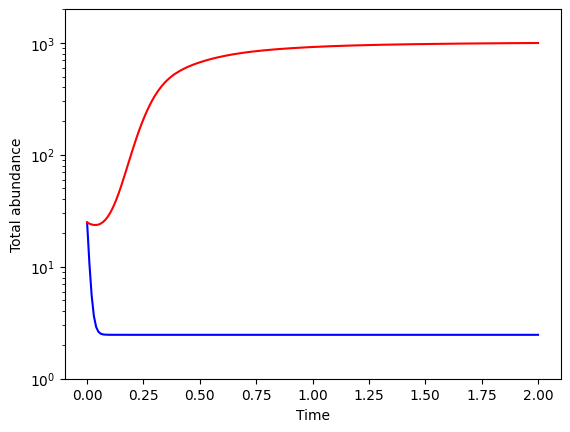

In [7]:
# This plot shows the total abundance. Red for the HMA and blue for the LMA.

Xtot1 = np.sum(X1,axis=0)
Xtot2 = np.sum(X2,axis=0)
plt.plot(solT,Xtot1,c='blue')
plt.plot(solT,Xtot2,c='red')
plt.yscale('log')
plt.ylabel('Total abundance')
plt.xlabel('Time')
plt.ylim(1,2000)

Only pump rates are different:

In [8]:
y0 = 0.1*np.random.rand(n)
y0 = np.concatenate([y0,y0])
sol,solT = Model(y0,g,e,e/10,D,w,de,de,ti,maxtime) # Here, the HMA selection (de) is made the same as the LMA

X1 = sol.T[:n]
X2 = sol.T[n:]

Text(0.5, 0, 'Time')

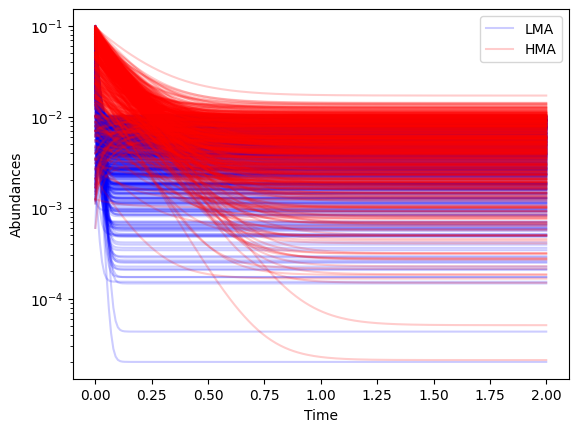

In [9]:
for i in range(X1.shape[0]):
  if(i==0):
    plt.plot(solT,X1[i],c='blue',alpha=0.2,label='LMA')
  else:
    plt.plot(solT,X1[i],c='blue',alpha=0.2)
for i in range(X2.shape[0]):
  if(i==0):
    plt.plot(solT,X2[i],c='red',alpha=0.2,label='HMA')
  else:
    plt.plot(solT,X2[i],c='red',alpha=0.2)

plt.legend(loc='best')
plt.ylabel('Abundances')
plt.yscale('log')
plt.xlabel('Time')

(1, 2000)

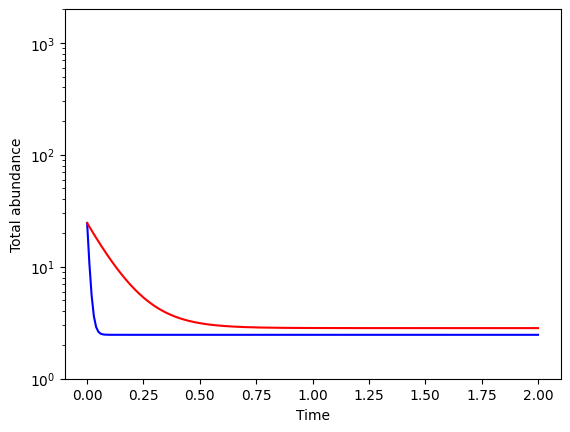

In [10]:
Xtot1 = np.sum(X1,axis=0)
Xtot2 = np.sum(X2,axis=0)
plt.plot(solT,Xtot1,c='blue')
plt.plot(solT,Xtot2,c='red')
plt.yscale('log')
plt.ylabel('Total abundance')
plt.xlabel('Time')
plt.ylim(1,2000)

Only selection is different:

In [11]:
y0 = 0.1*np.random.rand(n)
y0 = np.concatenate([y0,y0])
sol,solT = Model(y0,g,e,e,D,w,de,10*de,ti,maxtime) # Here, the HMA pump rate (e) is made the same as the LMA

X1 = sol.T[:n]
X2 = sol.T[n:]

Text(0.5, 0, 'Time')

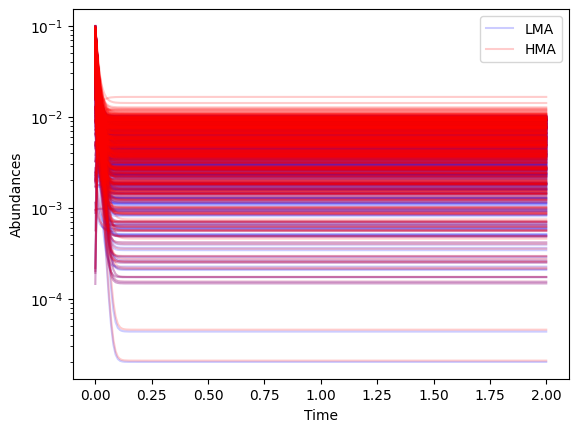

In [12]:
for i in range(X1.shape[0]):
  if(i==0):
    plt.plot(solT,X1[i],c='blue',alpha=0.2,label='LMA')
  else:
    plt.plot(solT,X1[i],c='blue',alpha=0.2)
for i in range(X2.shape[0]):
  if(i==0):
    plt.plot(solT,X2[i],c='red',alpha=0.2,label='HMA')
  else:
    plt.plot(solT,X2[i],c='red',alpha=0.2)

plt.legend(loc='best')
plt.ylabel('Abundances')
plt.yscale('log')
plt.xlabel('Time')

(1, 2000)

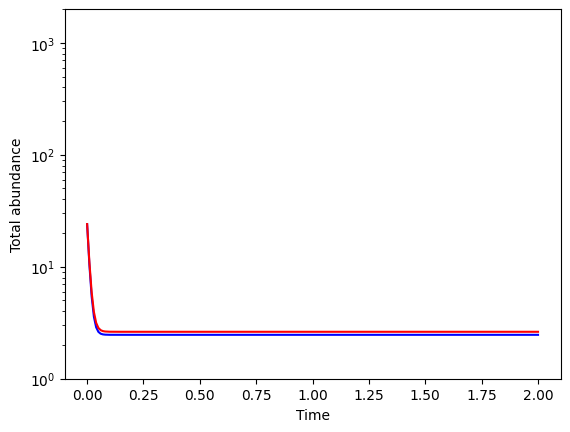

In [13]:
Xtot1 = np.sum(X1,axis=0)
Xtot2 = np.sum(X2,axis=0)
plt.plot(solT,Xtot1,c='blue')
plt.plot(solT,Xtot2,c='red')
plt.yscale('log')
plt.ylabel('Total abundance')
plt.xlabel('Time')
plt.ylim(1,2000)

# Direct solution

Here we simply sum all the terms for $N_h$, for each microbe:

$ \sum_i \frac{\sqrt{(\epsilon_h-\omega_i\delta_h^{t_i})^2+4\gamma\epsilon_hD_i}-(\epsilon_h-\omega_i\delta_h^{t_i})}{2\gamma} $

To obtain this equation, we assume equilibrium on the equation presented in the box. This means that all abundance variations (left-hand side) are set to zero. Then we isolate the $x_{ih}$ and sum them.

We do this for all situations: only pump rates are different (Ne), only selection is different (Nt), and both are different (N).

In [14]:
# We first initialise the lists to store the values of total abundances for each repeat of the model

n1list=[]
n2list=[]
ne1list=[]
ne2list=[]
nt1list=[]
nt2list=[]

nlist=[]
nelist=[]
ntlist=[]

itvec=np.linspace(0,100,100) # this iteration vector defines 100 repeat samples of the model
for c in itvec: # we run the calculation 100 times

  microbeSpecies=[]
  Nm=500 # number of microbe types inside each host

  for i in range(Nm): # for each microbe type we randomly define wi, Di, and ti
    wi=np.random.rand()
    Di=0.01*np.random.rand()
    ti=np.random.rand()
    microbeSpecies.append([wi,Di,ti]) # we store the values for each microbe type in a list

  # Parameters:
  g=1 # gamma

  # LMA values
  e1=100
  de1=5

  # HMA values
  de2=10*de1
  e2=e1/10


  N1=0
  N2=0
  Ne1=0
  Ne2=0
  Nt1=0
  Nt2=0
  for i in range(Nm): # Here we calculate each term in the sum and add them all
    wi,Di,ti=microbeSpecies[i]


    N1 += ( np.sqrt( 4*e1*Di*g + (e1-wi*de1**ti)**2 ) + wi*de1**ti-e1 )/(2*g)
    N2 += ( np.sqrt( 4*e2*Di*g + (e2-wi*de2**ti)**2 ) + wi*de2**ti-e2 )/(2*g)

    Ne1 += ( np.sqrt( 4*e1*Di*g + (e1-wi*de1**ti)**2 ) + wi*de1**ti-e1 )/(2*g)
    Ne2 += ( np.sqrt( 4*e2*Di*g + (e2-wi*de1**ti)**2 ) + wi*de1**ti-e2 )/(2*g)

    Nt1 += ( np.sqrt( 4*e1*Di*g + (e1-wi*de1**ti)**2 ) + wi*de1**ti-e1 )/(2*g)
    Nt2 += ( np.sqrt( 4*e1*Di*g + (e1-wi*de2**ti)**2 ) + wi*de2**ti-e1 )/(2*g)



  # Here we store in the lists dictionary entries with all relevant data (total abundances, mechanism labels, ratios). Storing data as dictionary entries makes it easier to generate dataframes later
  n1list.append({'N':N1,'Type':'LMA','Mechanism':'Both'})
  n2list.append({'N':N2,'Type':'HMA','Mechanism':'Both'})
  ne1list.append({'N':Ne1,'Type':'LMA','Mechanism':'Pump'})
  ne2list.append({'N':Ne2,'Type':'HMA','Mechanism':'Pump'})
  nt1list.append({'N':Nt1,'Type':'LMA','Mechanism':'Selection'})
  nt2list.append({'N':Nt2,'Type':'HMA','Mechanism':'Selection'})

  nlist.append({'Ratio (HMA/LMA)':N2/N1,'Mechanism':'Both'})
  nelist.append({'Ratio (HMA/LMA)':Ne2/Ne1,'Mechanism':'Pump'})
  ntlist.append({'Ratio (HMA/LMA)':Nt2/Nt1,'Mechanism':'Selection'})


In [15]:
# Here we use the lists to create a dataframe using pandas. With dataframes, we can properly analyse results that are presented with additional information, such as different labeled groups
data=[]
data.extend(n1list) # The extend function just puts together in the same list (data) all the lists we created before
data.extend(n2list)
data.extend(ne1list)
data.extend(ne2list)
data.extend(nt1list)
data.extend(nt2list)
df=pd.DataFrame(data) # This function creates the dataframe using the list of dictionary entries

In [20]:
df

,N,Type,Mechanism
0,2.714807,LMA,Both
1,2.528825,LMA,Both
2,2.598519,LMA,Both
3,2.616374,LMA,Both
4,2.529658,LMA,Both
...,...,...,...
595,2.746585,HMA,Selection
596,2.822458,HMA,Selection
597,2.667981,HMA,Selection
598,2.526332,HMA,Selection


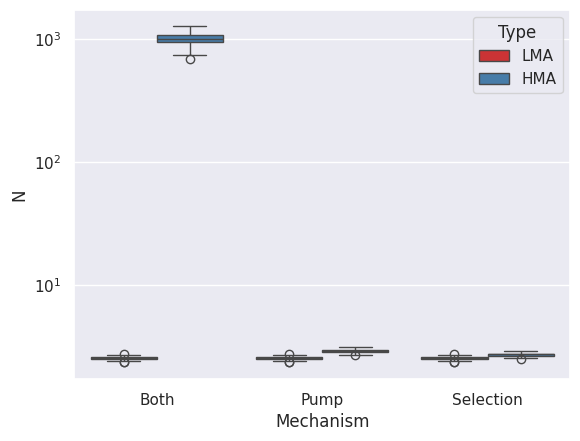

In [16]:
# Creating a boxplot with seaborn

# Add a dark grid
sns.set(style="darkgrid")

# Create and display the plot
sns.boxplot(x='Mechanism',
            y="N",
            hue="Type",
            data=df,
            palette="Set1",
            width=0.8)
plt.yscale('log')
#plt.ylim(0,100)

plt.show()

(0.01, 10000)

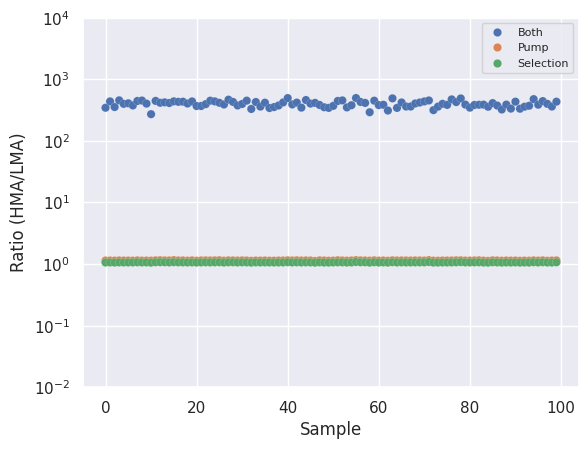

In [17]:
# Creating the scatterplot with total abundance ratios

datar=[]
datar.extend(nlist)
datar.extend(nelist)
datar.extend(ntlist)
dfr=pd.DataFrame(datar)

# this is just a way of creating a list for the samples, in the format: [0,1,2,3...100,0,1,2,3...100,0,1,2,3...100] (from zero to 100, 3 times)
ilist=[]
for j in range(3):
  for i in range(int(dfr.shape[0]/3)):
    ilist.append(i)

dfr['Sample']=ilist # This adds a new column to the dataframe with the sample labels


sns.scatterplot(data=dfr,x='Sample',y='Ratio (HMA/LMA)',hue='Mechanism',linewidth = 0.1)
plt.legend(fontsize=8)
plt.yscale('log')
plt.ylim(0.01,10000)

([<matplotlib.axis.YTick at 0x7b5f114fc580>,
 [Text(0, 1, '1'),
  Text(0, 100, '100'),
  Text(0, 250, '250'),
  Text(0, 500, '500')])

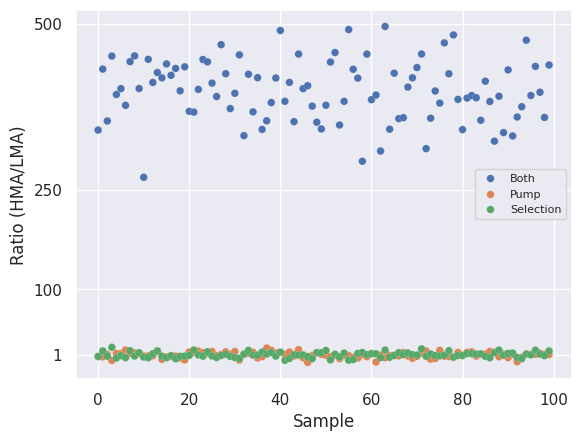

In [18]:
# This is the same as above, but with a nicer looking presentation of the ratios

datar=[]
datar.extend(nlist)
datar.extend(nelist)
datar.extend(ntlist)
dfr=pd.DataFrame(datar)

dfr['Ratio (HMA/LMA)'] += 4*np.random.randn(dfr.shape[0]) # Here we create a small jitter for better visualisation of the pump and selection lines, which are all together with ratio 1.

ilist=[]
for j in range(3):
  for i in range(int(dfr.shape[0]/3)):
    ilist.append(i)

dfr['Sample']=ilist


sns.scatterplot(data=dfr,x='Sample',y='Ratio (HMA/LMA)',hue='Mechanism',linewidth = 0.1,s=30)
plt.legend(fontsize=8)
#plt.yscale('log')
#plt.ylim(0,600)
plt.yticks([1,100,250,500])